In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

DATA_FOLDER = "../DATA/"

In [17]:
train = pd.read_parquet(DATA_FOLDER + "RAW/train.parq").dropna().drop_duplicates()
train

,attack_time,watcher_country,watcher_as_num,watcher_as_name,attacker_country,attacker_as_num,attacker_as_name,attack_type,watcher_uuid_enum,attacker_ip_enum,label
0,2023-07-31 07:17:51+00:00,DE,34011.0,Host Europe GmbH,TR,47721.0,Murat Aktas,http:exploit,0,6466,0
1,2023-07-31 07:17:51+00:00,DE,34011.0,Host Europe GmbH,TR,47721.0,Murat Aktas,http:spam,0,6466,0
2,2023-07-31 07:17:49+00:00,DE,20886.0,bn:t Blatzheim Networks Telecom GmbH,DE,51167.0,Contabo GmbH,http:bruteforce,2,4637,0
3,2023-07-31 07:17:49+00:00,DE,20886.0,bn:t Blatzheim Networks Telecom GmbH,DE,51167.0,Contabo GmbH,http:spam,2,4637,0
4,2023-07-31 07:17:49+00:00,DE,20886.0,bn:t Blatzheim Networks Telecom GmbH,DE,51167.0,Contabo GmbH,http:exploit,2,4637,0
...,...,...,...,...,...,...,...,...,...,...,...
61629671,2023-08-24 21:14:59+00:00,US,22611.0,INMOTION,US,7018.0,ATT-INTERNET4,http:bruteforce,9606,191439,0
61629673,2023-08-24 21:14:59+00:00,US,22611.0,INMOTION,US,7018.0,ATT-INTERNET4,http:scan,9606,191439,0
61629674,2023-08-24 21:14:59+00:00,US,22611.0,INMOTION,US,7018.0,ATT-INTERNET4,http:exploit,9606,191439,0
61629681,2023-08-24 21:14:46+00:00,US,22612.0,NAMECHEAP-NET,US,23033.0,WOW,http:scan,40383,193446,0


In [18]:
time_series = train[train["attacker_country"].isin(["US"])][["attack_time", "label"]]
time_series["attack_day"] = time_series["attack_time"].dt.day
time_series["attack_time"] = time_series["attack_time"].dt.time
time_series = time_series[time_series["label"] == 1]
time_series

,attack_time,label,attack_day
1522,07:05:59,1,1
1523,07:05:59,1,1
2581,09:51:29,1,1
2582,09:51:29,1,1
3491,20:09:39,1,31
...,...,...,...
61628347,17:21:38,1,11
61628444,22:20:24,1,23
61628445,22:20:24,1,23
61629372,21:09:44,1,24


In [19]:
time_series['attack_time'] = pd.to_datetime(time_series['attack_time'], format='%H:%M:%S').dt.hour# + pd.to_datetime(melted_time_series['attack_time'], format='%H:%M:%S').dt.minute / 60
time_series

,attack_time,label,attack_day
1522,7,1,1
1523,7,1,1
2581,9,1,1
2582,9,1,1
3491,20,1,31
...,...,...,...
61628347,17,1,11
61628444,22,1,23
61628445,22,1,23
61629372,21,1,24


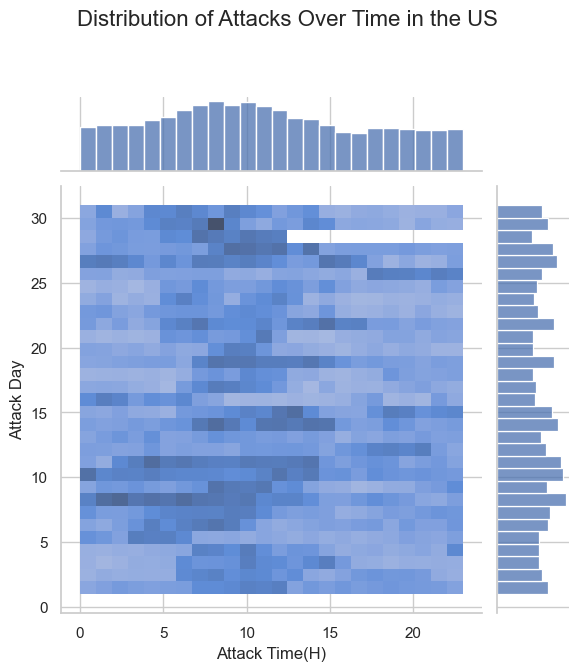

In [20]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a joint plot
plot = sns.jointplot(
    x="attack_time",
    y="attack_day",
    data=time_series,
    kind="hist",
    bins=(24, 31),
)

# Set axis labels and plot title
plot.set_axis_labels("Attack Time(H)", "Attack Day", fontsize=12)

# Add explanatory text
plt.text(
    x=0.5,
    y=1.1,
    s="Distribution of Attacks Over Time in the US",
    fontsize=16,
    ha='center',
    va='center',
    transform=plot.fig.transFigure
)

# Show the plot
plt.show()